In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#Estilizar conteúdo
warnings.filterwarnings('ignore')

def estilo_tabelas(df, max_altura='200px', casas_decimais=3):
    return (
        df.style.set_table_styles(
            [
                {'selector': 'thead th', 'props': [('font-size', '12px'), ('text-align', 'center'), ('border-bottom', '2px solid #007BFF')]},  # Azul abaixo do nome das colunas
                {'selector': 'td', 'props': [('font-size', '10px'), ('text-align', 'center'), ('max-height', '40px'), ('white-space', 'nowrap'), ('text-overflow', 'ellipsis'), ('overflow', 'hidden'), ('max-width', '100px')]},
                {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f9f9f9')]},  # Fundo alternado
                {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#ffffff')]},
                {'selector': 'table', 'props': [('width', '90%'), ('margin-left', 'auto'), ('margin-right', 'auto'), ('border-collapse', 'collapse')]},
                {'selector': 'td, th', 'props': [('border', '1px solid #666')]},  # Bordas cinza escuro
            ]
        ).set_properties(
            **{'background-color': '#f4f4f4', 'border-color': 'darkgray', 'border-style': 'solid', 'border-width': '1px'}
        ).set_table_attributes(
            f'style="height:auto; overflow:auto; max-height:{max_altura}; display:block;"'  # Define a altura máxima e a rolagem
        ).format(
            precision=casas_decimais  # Limita o número de casas decimais
        )
    )

In [2]:
object_columns = ['Protocolo_S2iD', 'Nome_Municipio', 'Sigla_UF', 'regiao',
                  'Setores Censitários', 'Status', 'DH_Descricao', 'DM_Descricao',
                  'DA_Descricao', 'DA_Polui/cont da água', 'DA_Polui/cont do ar',
                  'DA_Polui/cont do solo', 'DA_Dimi/exauri hídrico',
                  "DA_Incêndi parques/APA's/APP's", 'PEPL_Descricao', 'PEPR_Descricao',
                  'Categoria', 'Grupo', 'Subgrupo', 'Tipo', 'Subtipo']

dtype = {col: 'object' for col in object_columns}

df_eventos = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_desastres_rec_nrec.csv",
    sep=';',
    dtype = dtype,
    decimal=',',
)

estilo_tabelas(df_eventos.head(5))

,Protocolo_S2iD,Nome_Municipio,Sigla_UF,regiao,Data_Registro,Data_Evento,codigo_ibge,Setores Censitários,Status,DH_Descricao,DH_MORTOS,DH_FERIDOS,DH_ENFERMOS,DH_DESABRIGADOS,DH_DESALOJADOS,DH_DESAPARECIDOS,DH_OUTROS AFETADOS,DH_total_danos_humanos,DM_Descricao,DM_Uni Habita Danificadas,DM_Uni Habita Destruidas,DM_Uni Habita Valor,DM_Inst Saúde Danificadas,DM_Inst Saúde Destruidas,DM_Inst Saúde Valor,DM_Inst Ensino Danificadas,DM_Inst Ensino Destruidas,DM_Inst Ensino Valor,DM_Inst Serviços Danificadas,DM_Inst Serviços Destruidas,DM_Inst Serviços Valor,DM_Inst Comuni Danificadas,DM_Inst Comuni Destruidas,DM_Inst Comuni Valor,DM_Obras de Infra Danificadas,DM_Obras de Infra Destruidas,DM_Obras de Infra Valor,DM_total_danos_materiais,DA_Descricao,DA_Polui/cont da água,DA_Polui/cont do ar,DA_Polui/cont do solo,DA_Dimi/exauri hídrico,DA_Incêndi parques/APA's/APP's,PEPL_Descricao,PEPL_Assis_méd e emergên(R$),PEPL_Abast de água pot(R$),PEPL_sist de esgotos sanit(R$),PEPL_Sis limp e rec lixo (R$),PEPL_Sis cont pragas (R$),PEPL_distrib energia (R$),PEPL_Telecomunicações (R$),PEPL_Tran loc/reg/l_curso (R$),PEPL_Distrib combustíveis(R$),PEPL_Segurança pública (R$),PEPL_Ensino (R$),PEPL_total_publico,PEPR_Descricao,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR,Empenhado,DensidadePop,Hab,Area,Ano,PIB,Categoria,Grupo,Subgrupo,Tipo,Subtipo,COBRADE
0,SC-F-4200903-12200-20141226,Angelina,SC,Sul,2015-01-02 00:00:00,2015-01-02,4200903,nan,Reconhecido,"Moradores da comunidade que ficarem desprovidos de locomoção, trafegabilidade e acessos.",0,0,0,0,0,0,1500,1500,"Os danos são representados pelas avarias/destruições acentuadas resultantes nas estradas/pontes vicinais do município, em virtude das enxurradas, que resultaram na erosão/deslocamento acentuado do saibro alocado nas estradas, bem como em sérios danos aos sistemas de drenagens/pontes de madeira/concreto, em que algumas foram arrancadas em sua totalidade, além da queda de barreiras e do estreitamento das pistas de rolamento das estradas vicinais, devido ao avanço do leito do rio. Ademais, houve danos às residências localizadas no entorno do rio, bem como à unidade de saúde/escola/galpão comunitário da Comunidade do Rio Novo, principalmente devido à interrupção do acesso e dos serviços ofertados.",0,0,0.000,0.000,0,0.000,0.000,0,0.000,0,0,0.000,0,0,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,"No caso exposto, os prejuízos públicos são representados pelo aumento de demandas na área de saúde, resultantes da disponibilização de equipes de saúde e implantação de plantões, para atendimento à população, além do fornecimento de medicamentes, bem como a realização de ação/campanha de combate a leptospirose. Ademais, são necessários dispêndios acentuados para limpeza de vias públicas e rios, visando à retirada de entulhos, bem como para restabelecimentos dos sistemas de comunicação/energia.",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"Quebra/perda da produção agrícola/pecuária, ocasionada pelo não escoamento da produção, em virtude da interrupção do trafego de veículos, devido ao alagamento de vias públicas.",0.000,0.000,0.000,0.000,0.000,0.000,0.000,nan,10.720,5358.000,499.998,2015.000,103375.000,Natural,Hidrológico,Enxurradas,nan,nan,12200
1,MS-F-5000708-12200-20141222,Anastácio,MS,Centro-oeste,2015-01-05 00:00:00,2015-01-05,5000708,nan,Reconhecido,Ficaram prejudicados um total de 800 famílias que encontram-se em situação de isolamento total sem condições de escoarem seus produtos diversos da agricultura familiar e sem condições de locomoção.,0,0,0,0,0,0,3200,3200,"Foram danificadas tum total de 8 pontes que interligam esses locais através destas estradas, 05 (cinco) foram danificadas e 03 (três) totalmente destruídas e vários trechos das estradas vicinais e entornos.",0,0,0.000,0.000,0,0.000,0.000,0,0.000,0,0,0.000,0,0,0.000,0.000,0.000,6271293.520,6271293.520,nan,nan,nan,nan,nan,

In [3]:
df_eventos.dtypes.reset_index().rename(columns={0: '.dtype', 'index': 'Variável'})

,Variável,.dtype
0,Protocolo_S2iD,object
1,Nome_Municipio,object
2,Sigla_UF,object
3,regiao,object
4,Data_Registro,object
...,...,...
72,Grupo,object
73,Subgrupo,object
74,Tipo,object
75,Subtipo,object


In [4]:
display(df_eventos.describe())

,codigo_ibge,DH_MORTOS,DH_FERIDOS,DH_ENFERMOS,DH_DESABRIGADOS,DH_DESALOJADOS,DH_DESAPARECIDOS,DH_OUTROS AFETADOS,DH_total_danos_humanos,DM_Uni Habita Danificadas,...,PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR,Empenhado,DensidadePop,Hab,Area,Ano,PIB,COBRADE
count,1.834600e+04,18346.000000,18346.000000,18346.000000,18346.000000,18346.000000,18346.000000,1.834600e+04,1.834600e+04,18346.000000,...,1.834600e+04,1.834600e+04,1.834600e+04,3.874000e+03,18346.000000,1.834600e+04,18346.000000,12531.000000,1.253100e+04,18346.000000
mean,3.151875e+06,0.060504,2.045787,35.359261,28.713834,150.905702,0.046059,7.876583e+03,8.093711e+03,67.527199,...,2.570607e+05,1.575776e+07,1.718038e+07,1.430746e+06,78.756341,3.211927e+04,1955.595464,2018.215944,9.569803e+05,13664.657746
std,9.190727e+05,1.050350,49.676653,462.825569,341.129178,1139.677129,3.062999,3.169355e+04,3.186091e+04,781.600779,...,7.121982e+06,1.245502e+08,1.256257e+08,5.109620e+06,403.391348,1.583464e+05,7011.803382,2.009706,1.087723e+07,972.867231
min,1.100015e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.150000,1.010000e+03,3.565000,2015.000000,1.476100e+04,11110.000000
25%,2.506905e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.200000e+02,8.145000e+02,0.000000,...,0.000000e+00,0.000000e+00,1.381622e+05,1.297837e+05,11.140000,5.812000e+03,218.595000,2017.000000,7.743750e+04,13214.000000
50%,2.929800e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.071000e+03,3.252000e+03,0.000000,...,0.000000e+00,1.830780e+06,2.892670e+06,3.648177e+05,22.510000,1.200400e+04,479.815000,2018.000000,1.654160e+05,14110.000000
75%,4.202875e+06,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,7.800000e+03,8.000000e+03,0.000000,...,0.000000e+00,9.254561e+06,1.168021e+07,1.050095e+06,48.330000,2.462600e+04,1244.398000,2020.000000,4.116220e+05,14110.000000
max,5.300108e+06,78.000000,5586.000000,25219.000000,28490.000000,98644.000000,352.000000,2.100000e+06,2.100000e+06,35000.000000,...,6.790646e+08,9.747194e+09,9.748021e+09,1.010561e+08,13416.810000,1.145200e+07,159533.306000,2021.000000,7.635978e+08,25500.000000


In [5]:
#Verificar se há protocolos duplicados

df_eventos["Protocolo_S2iD"].duplicated().sum()

np.int64(0)

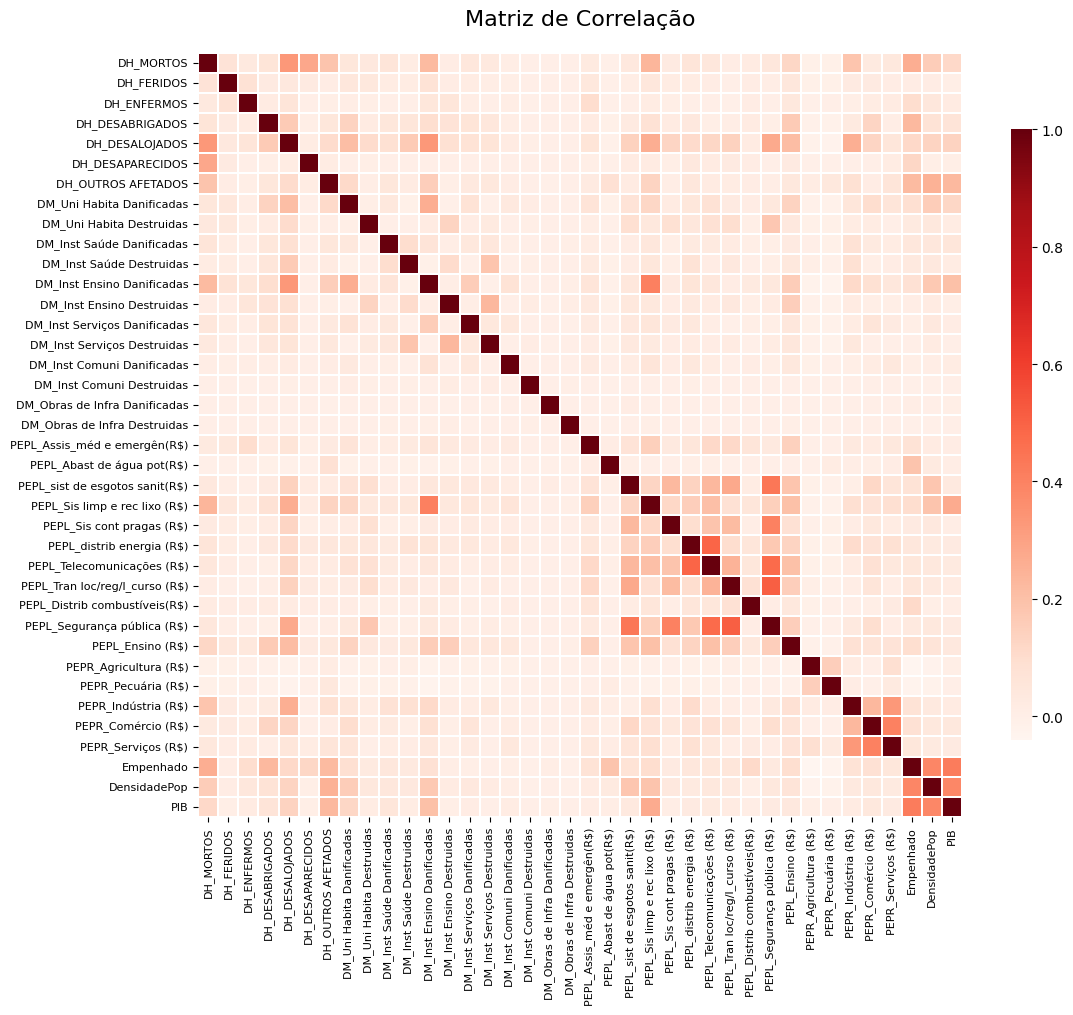

In [6]:
# Correlação entre as variáveis independentes

variaveisnum_todas = [
    'DH_MORTOS', 'DH_FERIDOS', 'DH_ENFERMOS', 'DH_DESABRIGADOS', 'DH_DESALOJADOS', 'DH_DESAPARECIDOS', 'DH_OUTROS AFETADOS',
    'DM_Uni Habita Danificadas', 'DM_Uni Habita Destruidas',  
    'DM_Inst Saúde Danificadas', 'DM_Inst Saúde Destruidas', 
    'DM_Inst Ensino Danificadas', 'DM_Inst Ensino Destruidas',  
    'DM_Inst Serviços Danificadas', 'DM_Inst Serviços Destruidas',  
    'DM_Inst Comuni Danificadas', 'DM_Inst Comuni Destruidas',  
    'DM_Obras de Infra Danificadas', 'DM_Obras de Infra Destruidas', 
    'PEPL_Assis_méd e emergên(R$)', 'PEPL_Abast de água pot(R$)', 'PEPL_sist de esgotos sanit(R$)', 
    'PEPL_Sis limp e rec lixo (R$)', 'PEPL_Sis cont pragas (R$)', 'PEPL_distrib energia (R$)', 
    'PEPL_Telecomunicações (R$)', 'PEPL_Tran loc/reg/l_curso (R$)', 'PEPL_Distrib combustíveis(R$)', 
    'PEPL_Segurança pública (R$)', 'PEPL_Ensino (R$)', 'PEPR_Agricultura (R$)', 
    'PEPR_Pecuária (R$)', 'PEPR_Indústria (R$)', 'PEPR_Comércio (R$)', 'PEPR_Serviços (R$)',
    'Empenhado', 'DensidadePop', 'PIB'
]

df_corr_todas = df_eventos[variaveisnum_todas]

correlacao_todas = df_corr_todas.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    correlacao_todas, 
    cmap="Reds", 
    annot=False, 
    linewidths=0.2, 
    linecolor='white',
    cbar_kws={"shrink": 0.8, "aspect": 30},
    square=True
)
plt.title('Matriz de Correlação', fontsize=16, pad=20)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

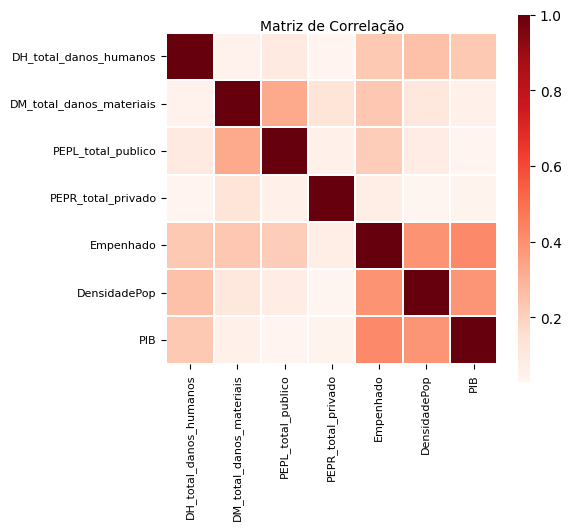

In [7]:
variaveisnum_selecionadas = [
    'DH_total_danos_humanos', 'DM_total_danos_materiais', 'PEPL_total_publico', 'PEPR_total_privado', 'Empenhado', 'DensidadePop', 'PIB'
]

df_corr_selecionadas = df_eventos[variaveisnum_selecionadas]

correlacao_selecionadas = df_corr_selecionadas.corr()

plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(
    correlacao_selecionadas, 
    cmap="Reds", 
    annot=False, 
    linewidths=0.2, 
    linecolor='white',
    cbar_kws={"shrink": 0.8, "aspect": 30},
    square=True
)
plt.title('Matriz de Correlação', fontsize=10, pad=2)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

In [8]:
status_counts = df_eventos['Status'].value_counts()
print("\nDistribuição da variável 'Status':")
display(status_counts)


Distribuição da variável 'Status':


Status
Reconhecido        16483
Não reconhecido     1863
Name: count, dtype: int64

In [9]:
df_na_counts = df_eventos.isna().sum().reset_index().rename(columns={0: 'Qtde. dados ausentes', 'index': 'Variável'})
df_na_counts['% de dados ausentes'] = (df_na_counts['Qtde. dados ausentes'] / len(df_eventos)) * 100
df_na_counts['Qtde. dados ausentes'] = df_na_counts['Qtde. dados ausentes'].astype(int)
df_na_counts = df_na_counts.sort_values(by='% de dados ausentes', ascending=False)
df_na_counts

,Variável,Qtde. dados ausentes,% de dados ausentes
40,DA_Polui/cont do ar,18213,99.275046
41,DA_Polui/cont do solo,17991,98.064973
39,DA_Polui/cont da água,17371,94.685490
43,DA_Incêndi parques/APA's/APP's,17009,92.712308
42,DA_Dimi/exauri hídrico,16668,90.853592
...,...,...,...
26,DM_Inst Ensino Destruidas,0,0.000000
25,DM_Inst Ensino Danificadas,0,0.000000
24,DM_Inst Saúde Valor,0,0.000000
23,DM_Inst Saúde Destruidas,0,0.000000


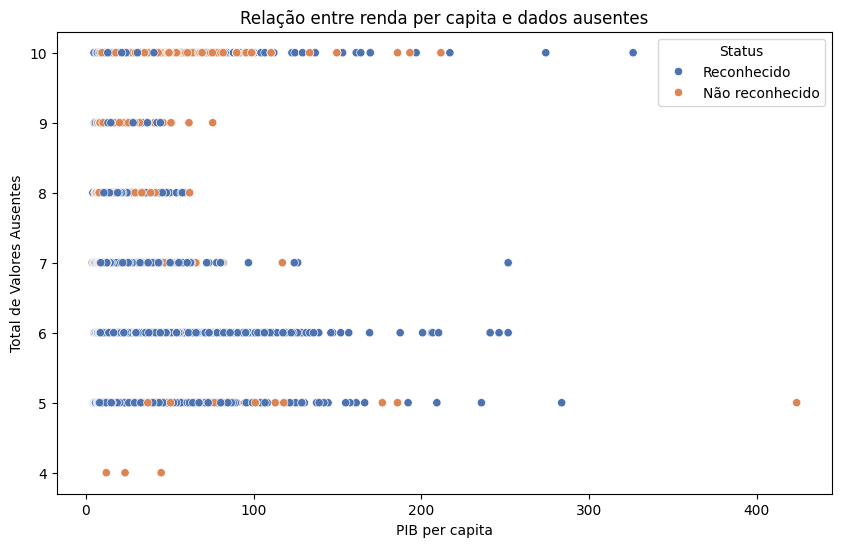

In [10]:
colunas = [
    'DA_Polui/cont do ar', 
    'DA_Polui/cont do solo', 
    'DA_Polui/cont da água', 
    "DA_Incêndi parques/APA's/APP's", 
    'DA_Dimi/exauri hídrico', 
    'DM_Descricao', 
    'DA_Descricao', 
    'PEPL_Descricao', 
    'PEPR_Descricao', 
    'DH_Descricao'
]

df_eventos_missing = df_eventos.copy()

df_eventos_missing = df_eventos_missing.dropna(subset=['PIB'])
#Existem dados para o PIB apenas até 2022.

df_eventos_missing['Total_Missing'] = df_eventos_missing[colunas].isnull().sum(axis=1)
df_eventos_missing['PIB_per_capita'] = df_eventos_missing['PIB'] / df_eventos_missing['Hab']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PIB_per_capita', y='Total_Missing', data=df_eventos_missing, hue='Status', palette='deep')
plt.title('Relação entre renda per capita e dados ausentes')
plt.xlabel('PIB per capita')
plt.ylabel('Total de Valores Ausentes')
plt.show()


In [11]:
correlation = df_eventos_missing['PIB_per_capita'].corr(df_eventos_missing['Total_Missing'])
print(f"\nCorrelação entre renda per capita e total de valores ausentes: {correlation:.2f}")


Correlação entre renda per capita e total de valores ausentes: 0.11


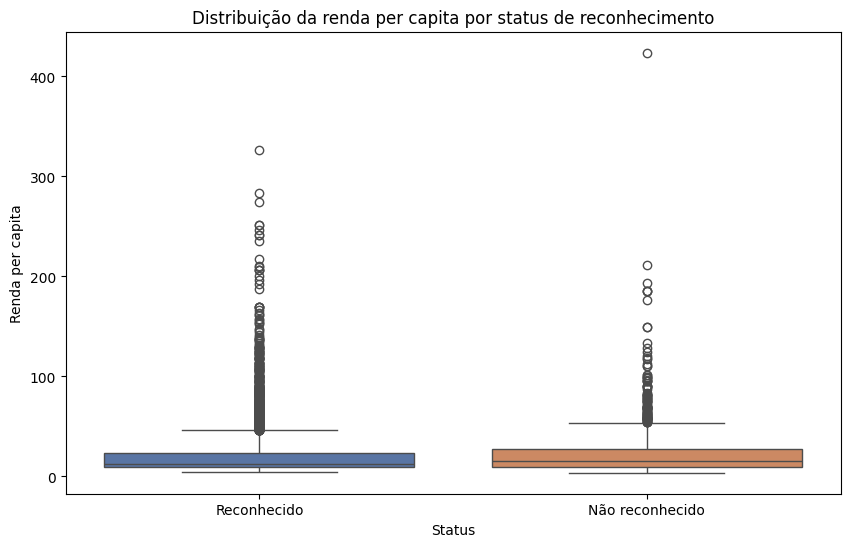

In [12]:
df_eventos_apos2022 = df_eventos.copy()

df_eventos_apos2022 = df_eventos_apos2022.dropna(subset=['PIB'])
#Existem dados para o PIB apenas até 2022.

df_eventos_apos2022['PIB_per_capita'] = df_eventos_apos2022['PIB'] / df_eventos_apos2022['Hab']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='PIB_per_capita', data=df_eventos_apos2022, palette='deep', order=status_counts.index)
plt.title('Distribuição da renda per capita por status de reconhecimento')
plt.xlabel('Status')
plt.ylabel('Renda per capita')
plt.xticks(rotation=0)
plt.show()

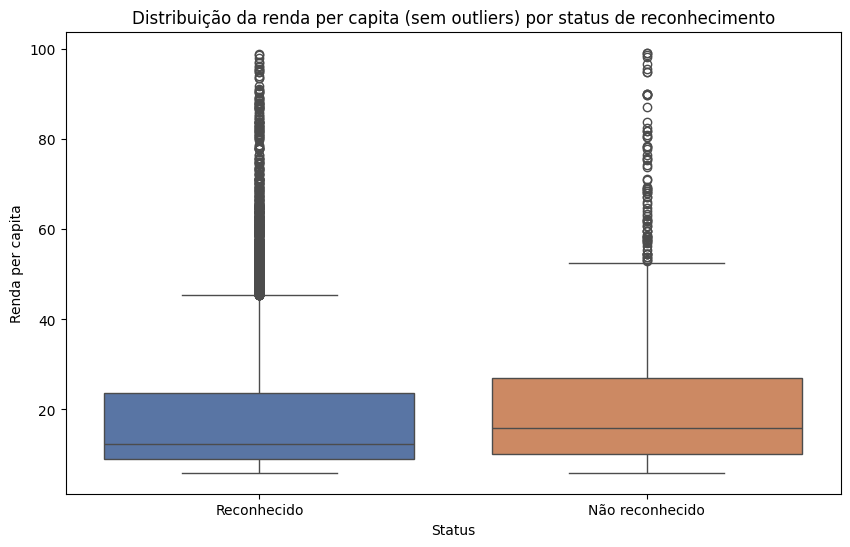

In [13]:
#Eliminando-se os outliers abaixo de 1% e acima de 99% para enxergar melhor a distribuição

q1 = df_eventos_apos2022['PIB_per_capita'].quantile(0.01)
q99 = df_eventos_apos2022['PIB_per_capita'].quantile(0.99)

df_eventos_filtrado = df_eventos_apos2022[(df_eventos_apos2022['PIB_per_capita'] >= q1) & (df_eventos_apos2022['PIB_per_capita'] <= q99)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='PIB_per_capita', data=df_eventos_filtrado, palette='deep', order=status_counts.index)
plt.title('Distribuição da renda per capita (sem outliers) por status de reconhecimento')
plt.xlabel('Status')
plt.ylabel('Renda per capita')
plt.xticks(rotation=0)
plt.show()